# Kick to orbit

Uses the 2turn madx outputs to calculate the orbit oscillation of the first two turns

In [2]:
%run /Users/esenes/cernbox/PS-analysis-tools/eTools.py
print '---'
sys.path.append('/Users/esenes/cernbox/')
import metaclass

Version 0.1
Use at your own risk. Please report bugs to eugenio.senes@cern.ch
Fork it at https://gitlab.cern.ch/esenes/PS-analysis-tools
---


In [16]:
import glob
# get the optics functions from the model
files = sorted(glob.glob('/Users/esenes/cernbox/PS-injection-steering/MADx/2turns'+'/*.twiss'))
print 'Found ' + str(len(files)) + ' data files'
print 'First: ' + files[0]
print 'End: ' + files[-1]

metaclasses = []

for file in files:
    metaclasses.append(metaclass.twiss(file))

    

Found 7 data files
First: /Users/esenes/cernbox/PS-injection-steering/MADx/2turns/2turns_0.05e-3.twiss
End: /Users/esenes/cernbox/PS-injection-steering/MADx/2turns/2turns_2e-3.twiss


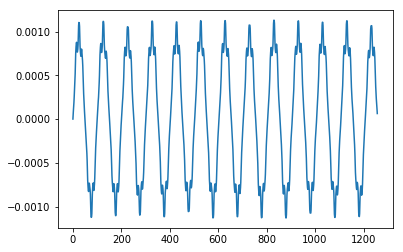

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(metaclasses[0].S, metaclasses[0].X)

In [41]:
X_1st = np.empty((43,len(metaclasses)),dtype=float)
X_2nd = np.empty((43,len(metaclasses)),dtype=float)

for l in range(len(metaclasses)):
    # get the optics functions from the model
    optics = metaclasses[l]

    # get the twiss at the BPMs position
    optics_names = optics.NAME
    BPM_name = []
    BPM_idx = []
    X = []
    Y = []

    for k in range(len(optics_names)):
        if optics_names[k].find('PR.BPM') != -1:
    #        print optics_names[k]
            BPM_name.append(optics_names[k])
            BPM_idx.append(k)
            X.append(optics.X[k])   
            Y.append(optics.Y[k])   

    # for some reason the last bpm is the 00, place it back at the beginning
    BPM_name = [BPM_name[-1]] + BPM_name[:-1]
    BPM_idx = [BPM_idx[-1]] + BPM_idx[:-1]
    X = [X[-1]] + X[:-1]
    Y = [Y[-1]] + Y[:-1]

    # casting stuff
    X = np.array(X)
    Y = np.array(Y)

    # splitting the turns
    X_1st[:,l] = X[:43]
    X_2nd[:,l] = X[43:]
    


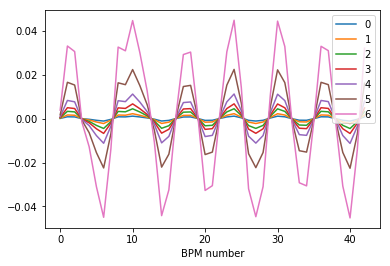

In [54]:
for k in range(7):
    plt.plot(X_1st[:,k], label=str(k))
plt.xlabel('BPM number')
plt.legend()

In [ ]:
for k in range(7):
    plt.plot(X_1st[:,k], label=str(k))
plt.xlabel('BPM number')
plt.legend()

In [83]:
def RMSD(x1, x2):
    return np.sqrt(((np.sum((x1-x2)**2)) / 43))

RMSDs = np.empty(7)

for k in range(7):
    RMSDs[k] = RMSD(X_1st[:,k],X_2nd[:,k])

0.00591348051079


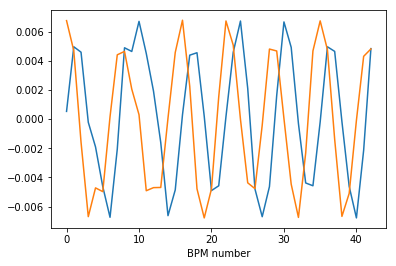

In [79]:
k=3
plt.plot(X_1st[:,k])
plt.plot(X_2nd[:,k])

print(np.sqrt(np.sum((X_1st[:,k]-X_2nd[:,k])**2)/43))

plt.xlabel('BPM number')
plt.legend()

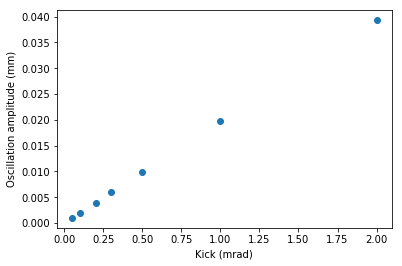

In [87]:
kicks = 1e-3*np.array([0.05, 0.1, 0.2, 0.3, 0.5, 1, 2])
plt.plot(1e3*kicks, RMSDs,'o')
plt.xlabel('Kick (mrad)')
plt.ylabel('Oscillation amplitude (mm)')